In [1]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
from IPython.display import display
from pprint import pprint

import pickle
from graph.graph_info import GraphManager, InfoManager


def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)


def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)


g: GraphManager = GraphManager()
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g = g_serialized


inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
print(inf.shape)
inf = inf[(inf.level_no != 0)] 
df = inf[~inf['similarity_with_l0th_parent_teket'].isnull()]
print(inf.shape, df.shape, inf.columns)

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})


(24326, 47)
(24325, 47) (17314, 47) Index(['paper_id', 'uuid', 'parent_paper_uuid', 'parent_paper_id', 'title',
       'level_no', 'multiple_appearances_in_levels_count',
       'multiple_appearances_in_levels', 'path_from_root', 'reference_count',
       'citation_count', 'influential_citation_count', 'published_date',
       'paper_type', 'venue', 'isOpenAccess', 'abstract', 'paper_link', 'doi',
       'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'influence_score',
       'similarity_with_l0th_parent_teket',
       'similarity_with_l1th_parent_teket',
       'similarity_with_l2th_parent_teket',
       'similarity_with_level_0_parent_em',
       'similarity_with_level_1_parent_em',
       'similarity_with_level_2_parent_em',
       'similarity_with_immediate_parent_em', 'in_deg_centrality',
       'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality', 'load_

In [2]:
def plot_one_vs_all_singleplot(df, x_col, y_cols, figsize=(20, 10), title=None, ylim=None, xlim=None, x_label=None, y_label=None, save_path=None, save_format='png', plot_type='scatter'):
	np.random.seed(43)
	fig, ax = plt.subplots(figsize=figsize)
	for y in y_cols:
		if plot_type == 'bar':
			ax.bar(df[x_col], df[y], label=y, color=np.random.rand(3, ))
		elif plot_type == 'line':
			ax.plot(df[x_col], df[y], label=y, color=np.random.rand(3,))
		else:
			ax.scatter(df[x_col], df[y], label=y, color=np.random.rand(3,))
	ax.legend()
	if title:
		ax.set_title(title)
	if ylim:
		ax.set_ylim(ylim)
	if xlim:
		ax.set_xlim(xlim)
	if x_label:
		ax.set_xlabel(x_label)
	if y_label:
		ax.set_ylabel(y_label)
	if save_path:
		plt.savefig(save_path, format=save_format, dpi=300)
	if x_label:
		ax.set_xlabel(x_label)
	if y_label:
		ax.set_ylabel(y_label)
	plt.show()


In [3]:
def plot_one_vs_all_subplots(df, x_col, y_cols, figsize=(20, 30), ylim=None, xlim=None, x_label=None, y_label=None, save_path=None, save_format='png', plot_type='scatter', random_seed=43, plot_with_seaborn=False, palette='Set1', hue=None):
	np.random.seed(random_seed)
	total_features_len = len(y_cols)
	total_subplots_row_len = int(total_features_len / 2) + \
		1 if total_features_len % 2 != 0 else int(total_features_len / 2)

	repeated_x_cols = [x_col] * total_features_len

	fig, ax = plt.subplots(total_subplots_row_len, 2, figsize=figsize)
	i = r = c = 0
	for x_col_, y_col_ in zip(repeated_x_cols, y_cols):
		if (i % 2 == 0) & (i > 0):
			r += 1
			c = 0
		# print(r,c)
		
		
		
		if not plot_with_seaborn:
			if plot_type == 'bar':
				ax[r,c].bat(df[x_col_], df[y_col_], label=y_col_, color=np.random.rand(3, ))
				if x_label:
					ax[r,c].set_xlabel(x_label)
				else:
					ax[r, c].set_xlabel(x_col_)
					
				if y_label:
					ax[r,c].set_ylabel(y_label)
				else:
					ax[r, c].set_ylabel(y_col_)
			else:
				ax[r,c].scatter(df[x_col_], df[y_col_], label=y_col_, color=np.random.rand(3,))
				if x_label:
					ax[r, c].set_xlabel(x_label)
				else:
					ax[r, c].set_xlabel(x_col_)
					
				if y_label:
					ax[r, c].set_ylabel(y_label)
				else:
					ax[r, c].set_ylabel(y_col_)
		else:
			if plot_type == 'bar':
				sns.barplot(x=x_col_, y=y_col_, data=df, ax=ax[r,c], palette=palette,hue=hue)
			else:
				sns.scatterplot(x=x_col_, y=y_col_, data=df, ax=ax[r, c], palette=palette, hue=hue)
		
		i += 1
		c += 1

	plt.show()



	

In [4]:
def plot_level_i_top_k(data, sum_cols, cols_for_plots, level_no=3, sort_col='aggregated', plot_type='line', isSave=False,n=None):
	selected_cols_for_plots =   cols_for_plots+['aggregated']

	# X = data[all_cols].copy()
	X = data.drop_duplicates(subset=['paper_id'], keep='first').copy()

	# X['Result'] = operation_callback(X, operation_cols)
	X['aggregated'] = X[sum_cols].sum(axis=1)
	X['aggregated'] = X['aggregated'] / len(sum_cols)

	X_level_i = X[X['level_no'] == level_no]
	if n:
		level_i_paper_len = n
	else:
		level_i_paper_len = X_level_i.shape[0]
	if sort_col != 'aggregated':
		# aggregated_label=sort_col
		aggregated_label = f'Agg({"+".join([f"F{i}" for i in range(len(sum_cols))])})'
	else:
		aggregated_label = f'Agg({"+".join([f"F{i}" for i in range(len(sum_cols))])})'

	level_i_top_k = X_level_i.sort_values(by=sort_col, ascending=False)[
            selected_cols_for_plots].head(level_i_paper_len)

	np.random.seed(43)
	x = np.arange(len(level_i_top_k))
	fig, ax = plt.subplots(figsize=(16, 8))
	for i,v in enumerate(level_i_top_k.columns):
		if plot_type == 'line':
			if v == 'aggregated':
				ax.plot(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.plot(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'bar':
			if v == 'aggregated':
				ax.bar(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.bar(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'barh':
			if v == 'aggregated':
				ax.barh(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.barh(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'hist':
			if v == 'aggregated':
				ax.hist(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.hist(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'box':
			if v == 'aggregated':
				ax.box(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.box(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'scatter':
			if v == 'aggregated':
				ax.scatter(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.scatter(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'hexbin':
			ax.hexbin(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'kde':
			ax.plot(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
			ax.hist(level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'area':
			if v == 'aggregated':
				ax.area(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.area(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'pie':
			if v == 'aggregated':
				ax.pie(x, level_i_top_k[v], label=aggregated_label, color='black')
			else:
				ax.pie(x, level_i_top_k[v], label=f'F{i}: {v}', color=np.random.rand(3,))

	plt.xlabel(
		f'Level {level_no}: Top {level_i_paper_len} ranked papers; sort by: `{sort_col}` score')
	plt.ylabel('Scores')
	plt.legend(loc='upper right')
	plt.show()
	if isSave:
		plt.savefig(f"plots/level_{level_no}_top_{level_i_paper_len}_ranked_papers_sort_by_{sort_col}.png",
		            format='png', transparent=False, dpi=300)
	plt.close()


## semantic analysis

### Univariate analysis

Text(0, 0.5, 'Similarity with 1st Level Parent')

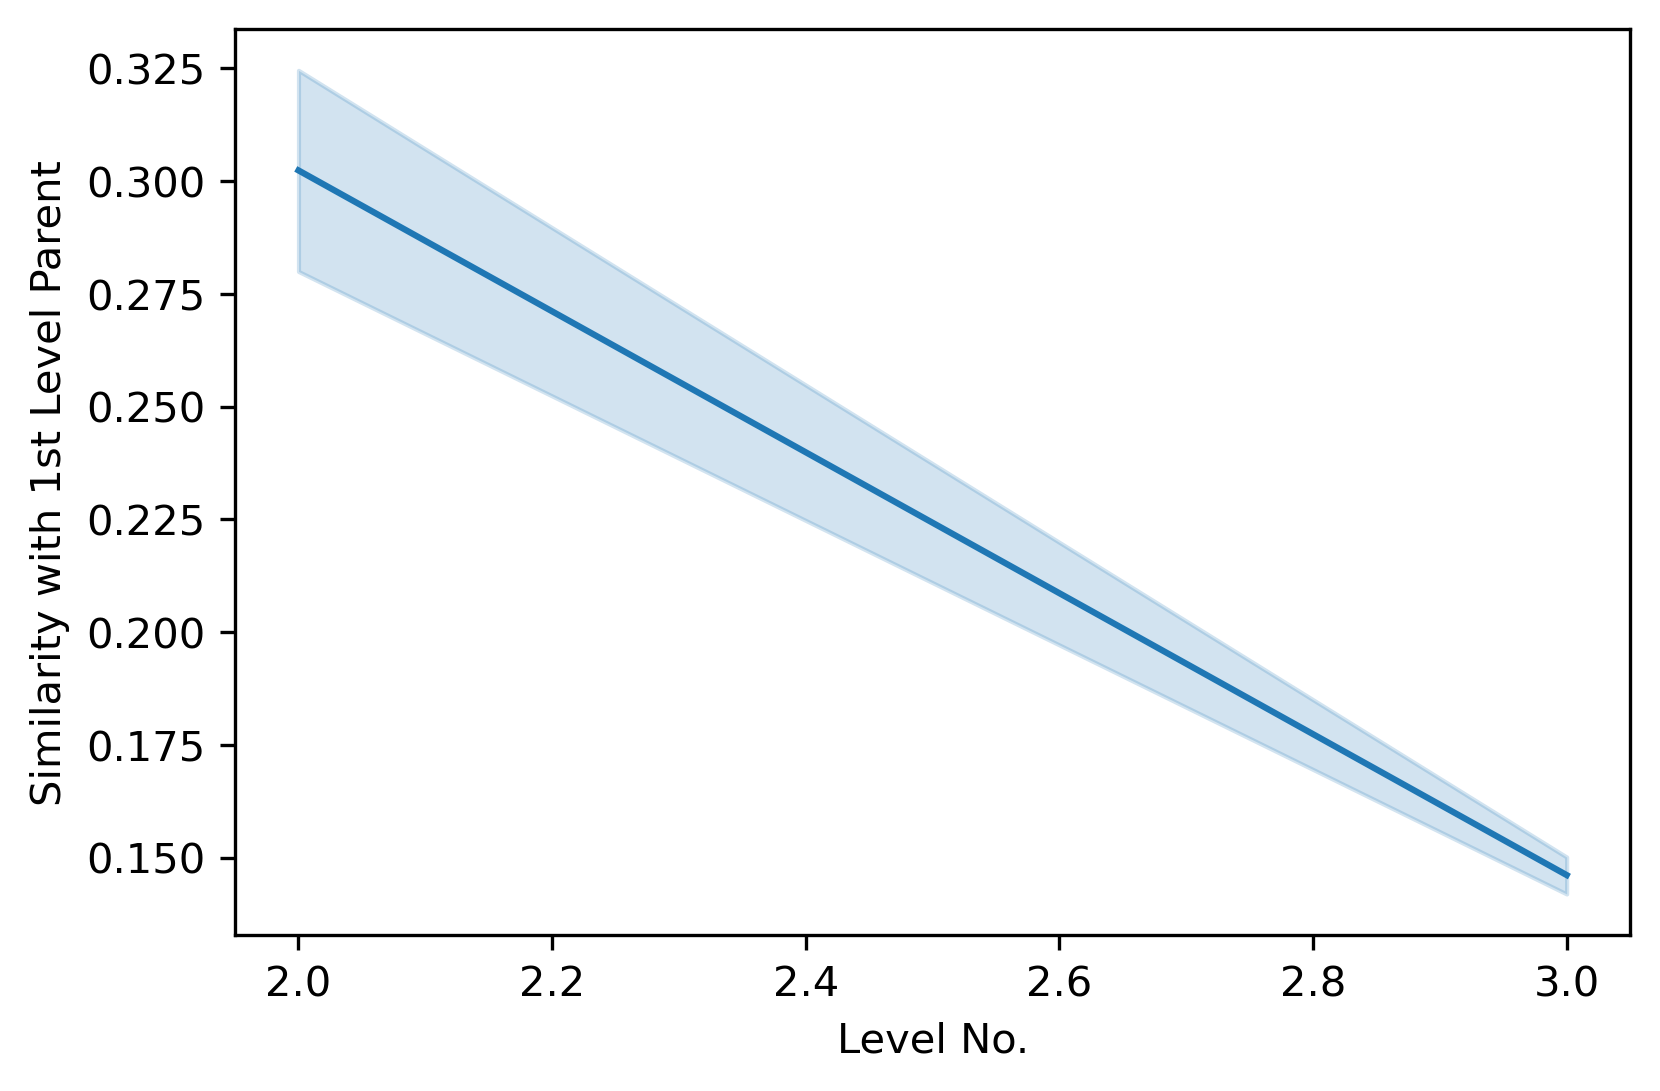

In [23]:
plt.figure(dpi=300)
D = inf[(inf.level_no != 1) ]  # & (inf.level_no != 0)

sns.lineplot(data=D, x="level_no",
            y="similarity_with_l1th_parent_teket", palette="winter")
plt.xlabel("Level No.")
plt.ylabel("Similarity with 1st Level Parent")
# plt.xticks([1,2,3])

# plt.xticks(rotation=90)
# plt.ylim(-.1,1)
# plt.savefig("plots/sim/similarity_with_l0_violin.png",
#             format='png', transparent=False, dpi=300)
# plt.savefig("plots/sim/similarity_with_l0_violin.svg",
#             format='svg', transparent=False, dpi=300)


## Influence

In [7]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler


In [20]:
min_max = MinMaxScaler()
inf['citation_count_min_max_norm'] = min_max.fit_transform(
    inf['citation_count'].values.reshape(-1, 1))
inf['age_min_max_norm'] = min_max.fit_transform(
    inf['age'].values.reshape(-1, 1))

standard = StandardScaler()

inf['citation_count_standard_norm'] = standard.fit_transform(
    inf['citation_count'].values.reshape(-1, 1))
inf['age_standard_norm'] = standard.fit_transform(
    inf['age'].values.reshape(-1, 1))
inf.head(n=2)


,paper_id,uuid,parent_paper_uuid,parent_paper_id,title,level_no,multiple_appearances_in_levels_count,multiple_appearances_in_levels,path_from_root,reference_count,...,in_deg_centrality_norm,out_deg_centrality_norm,degree_centrality_norm,closeness_centrality_norm,betweenness_centrality_norm,eigenvector_centrality_norm,load_centrality_norm,age_standard_norm,influence_score_v1,citation_count_standard_norm
1,03589e1917debe6df148cac8963fd008e4140237,ade6eb61-946a-49f3-835d-74804cb9de3e,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,1,41,"1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,...",8bde6cb8-296d-4593-883f-b768103e1e69;ade6eb61-...,29,...,0.315789,0.029112,0.062591,0.149682,0.602471,1.629019e-17,0.602327,-1.257999,0.652263,-0.138431
2,05dec9ff0f48f45b09245ba0354748961f18ff77,be2af112-6c57-4598-9813-d02fff71055b,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Citation-Enhanced Keyphrase Extraction from Re...,1,1,1,8bde6cb8-296d-4593-883f-b768103e1e69;be2af112-...,61,...,0.013158,0.085881,0.085881,0.006160,0.005063,6.052700e-24,0.005098,-1.603667,0.690367,-0.163085


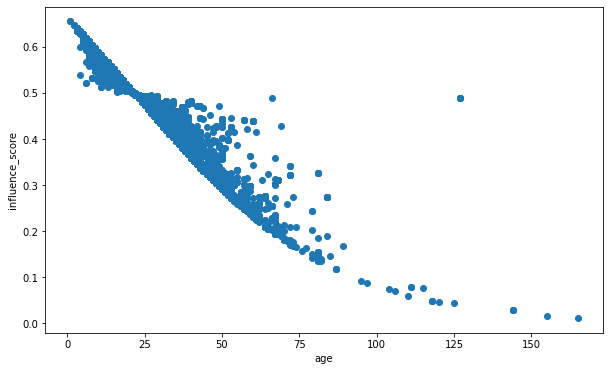

In [21]:

def calculateFreshness(row):
	_y = .3
	impact = row['citation_count_standard_norm'] + 1
	numerator = 1
	denominator = 1 + np.exp(_y * (1 / impact) * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


In [13]:
inf[((inf['age']==40))&(inf['citation_count']>10000)].sort_values(by='influence_score',ascending=False)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
23760,40.0,0.469922,59190
16735,40.0,0.469884,59104


In [22]:
inf[(inf['age']==40)].sort_values(by='influence_score',ascending=True)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
8897,40.0,0.359411,2
21316,40.0,0.359427,3


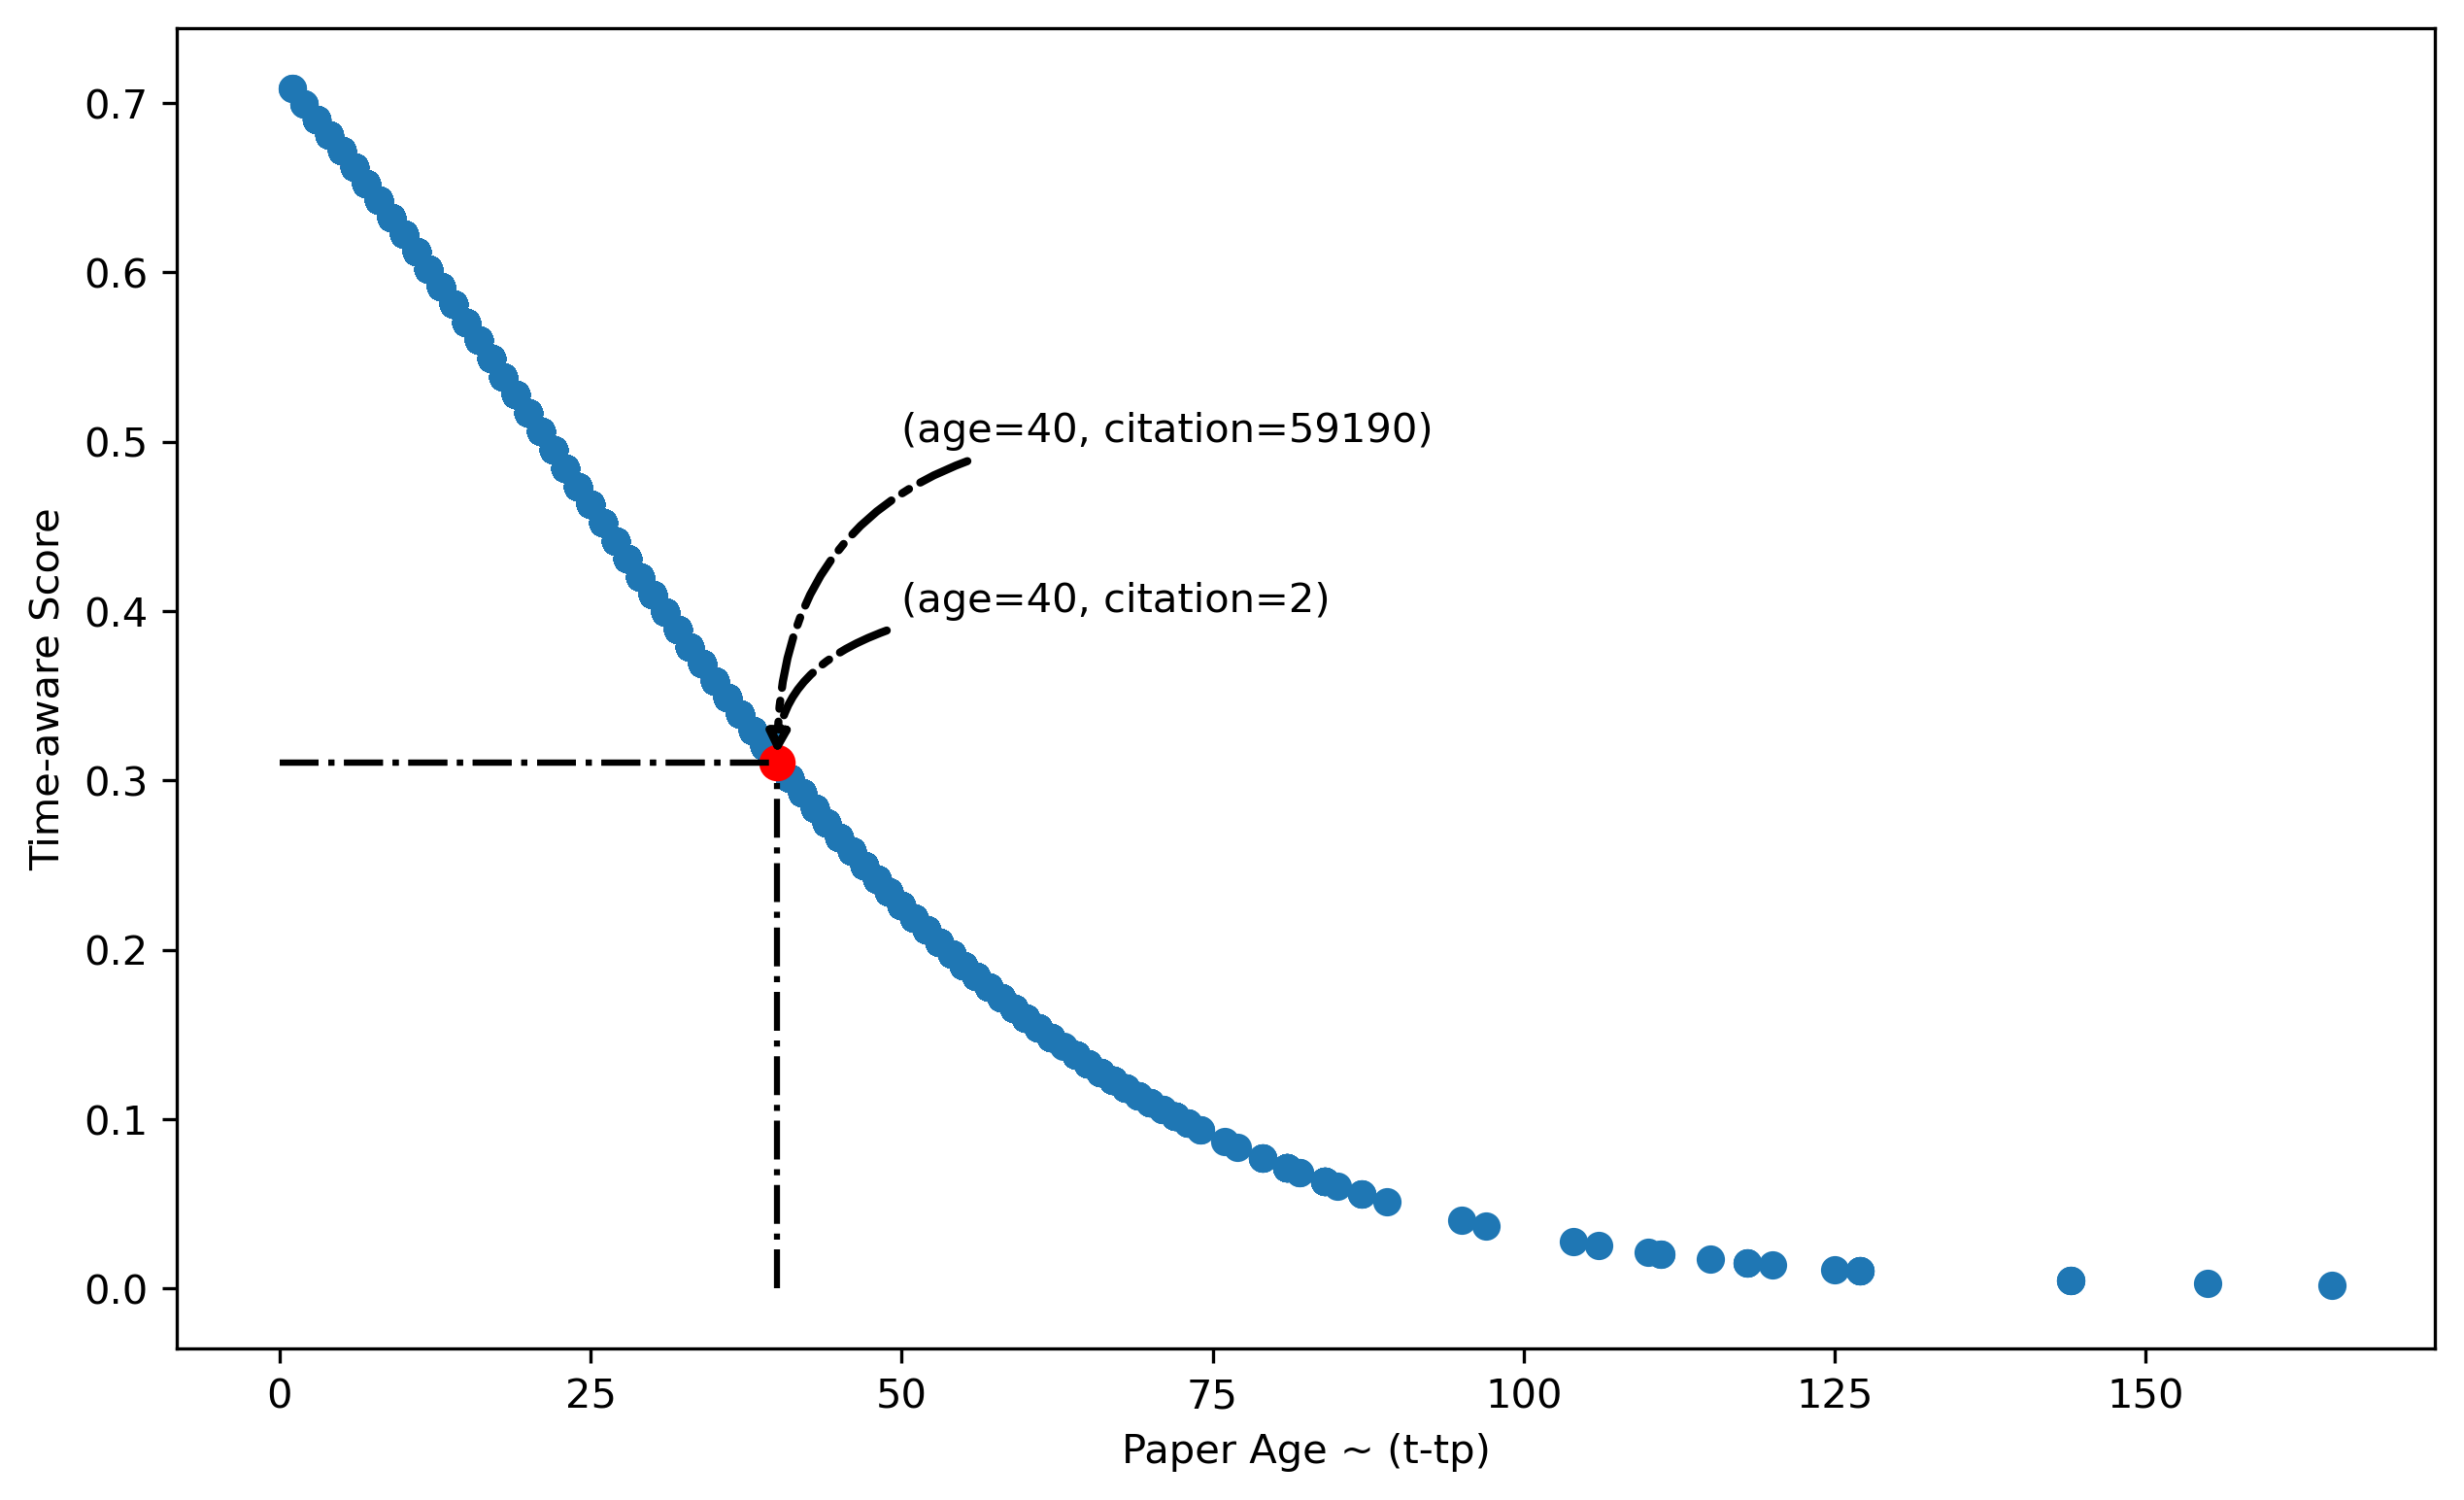

In [18]:
def calculateFreshness(row):
	_y = .5
	numerator = 1
	denominator = 1 + np.exp(_y * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score_v1'] = inf.apply(calculateFreshness, axis=1)
fig, ax = plt.subplots(figsize=(10, 6),dpi=300)
ax.scatter(inf['age'], inf['influence_score_v1'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.31046),
            xytext=(50, 0.5), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
ax.plot([40.0], [0.31046], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.31046),
            xytext=(50, 0.4), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
# vertical line
ax.plot([40.0, 40.0], [0, .3], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Score')
plt.show()


In [4]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})


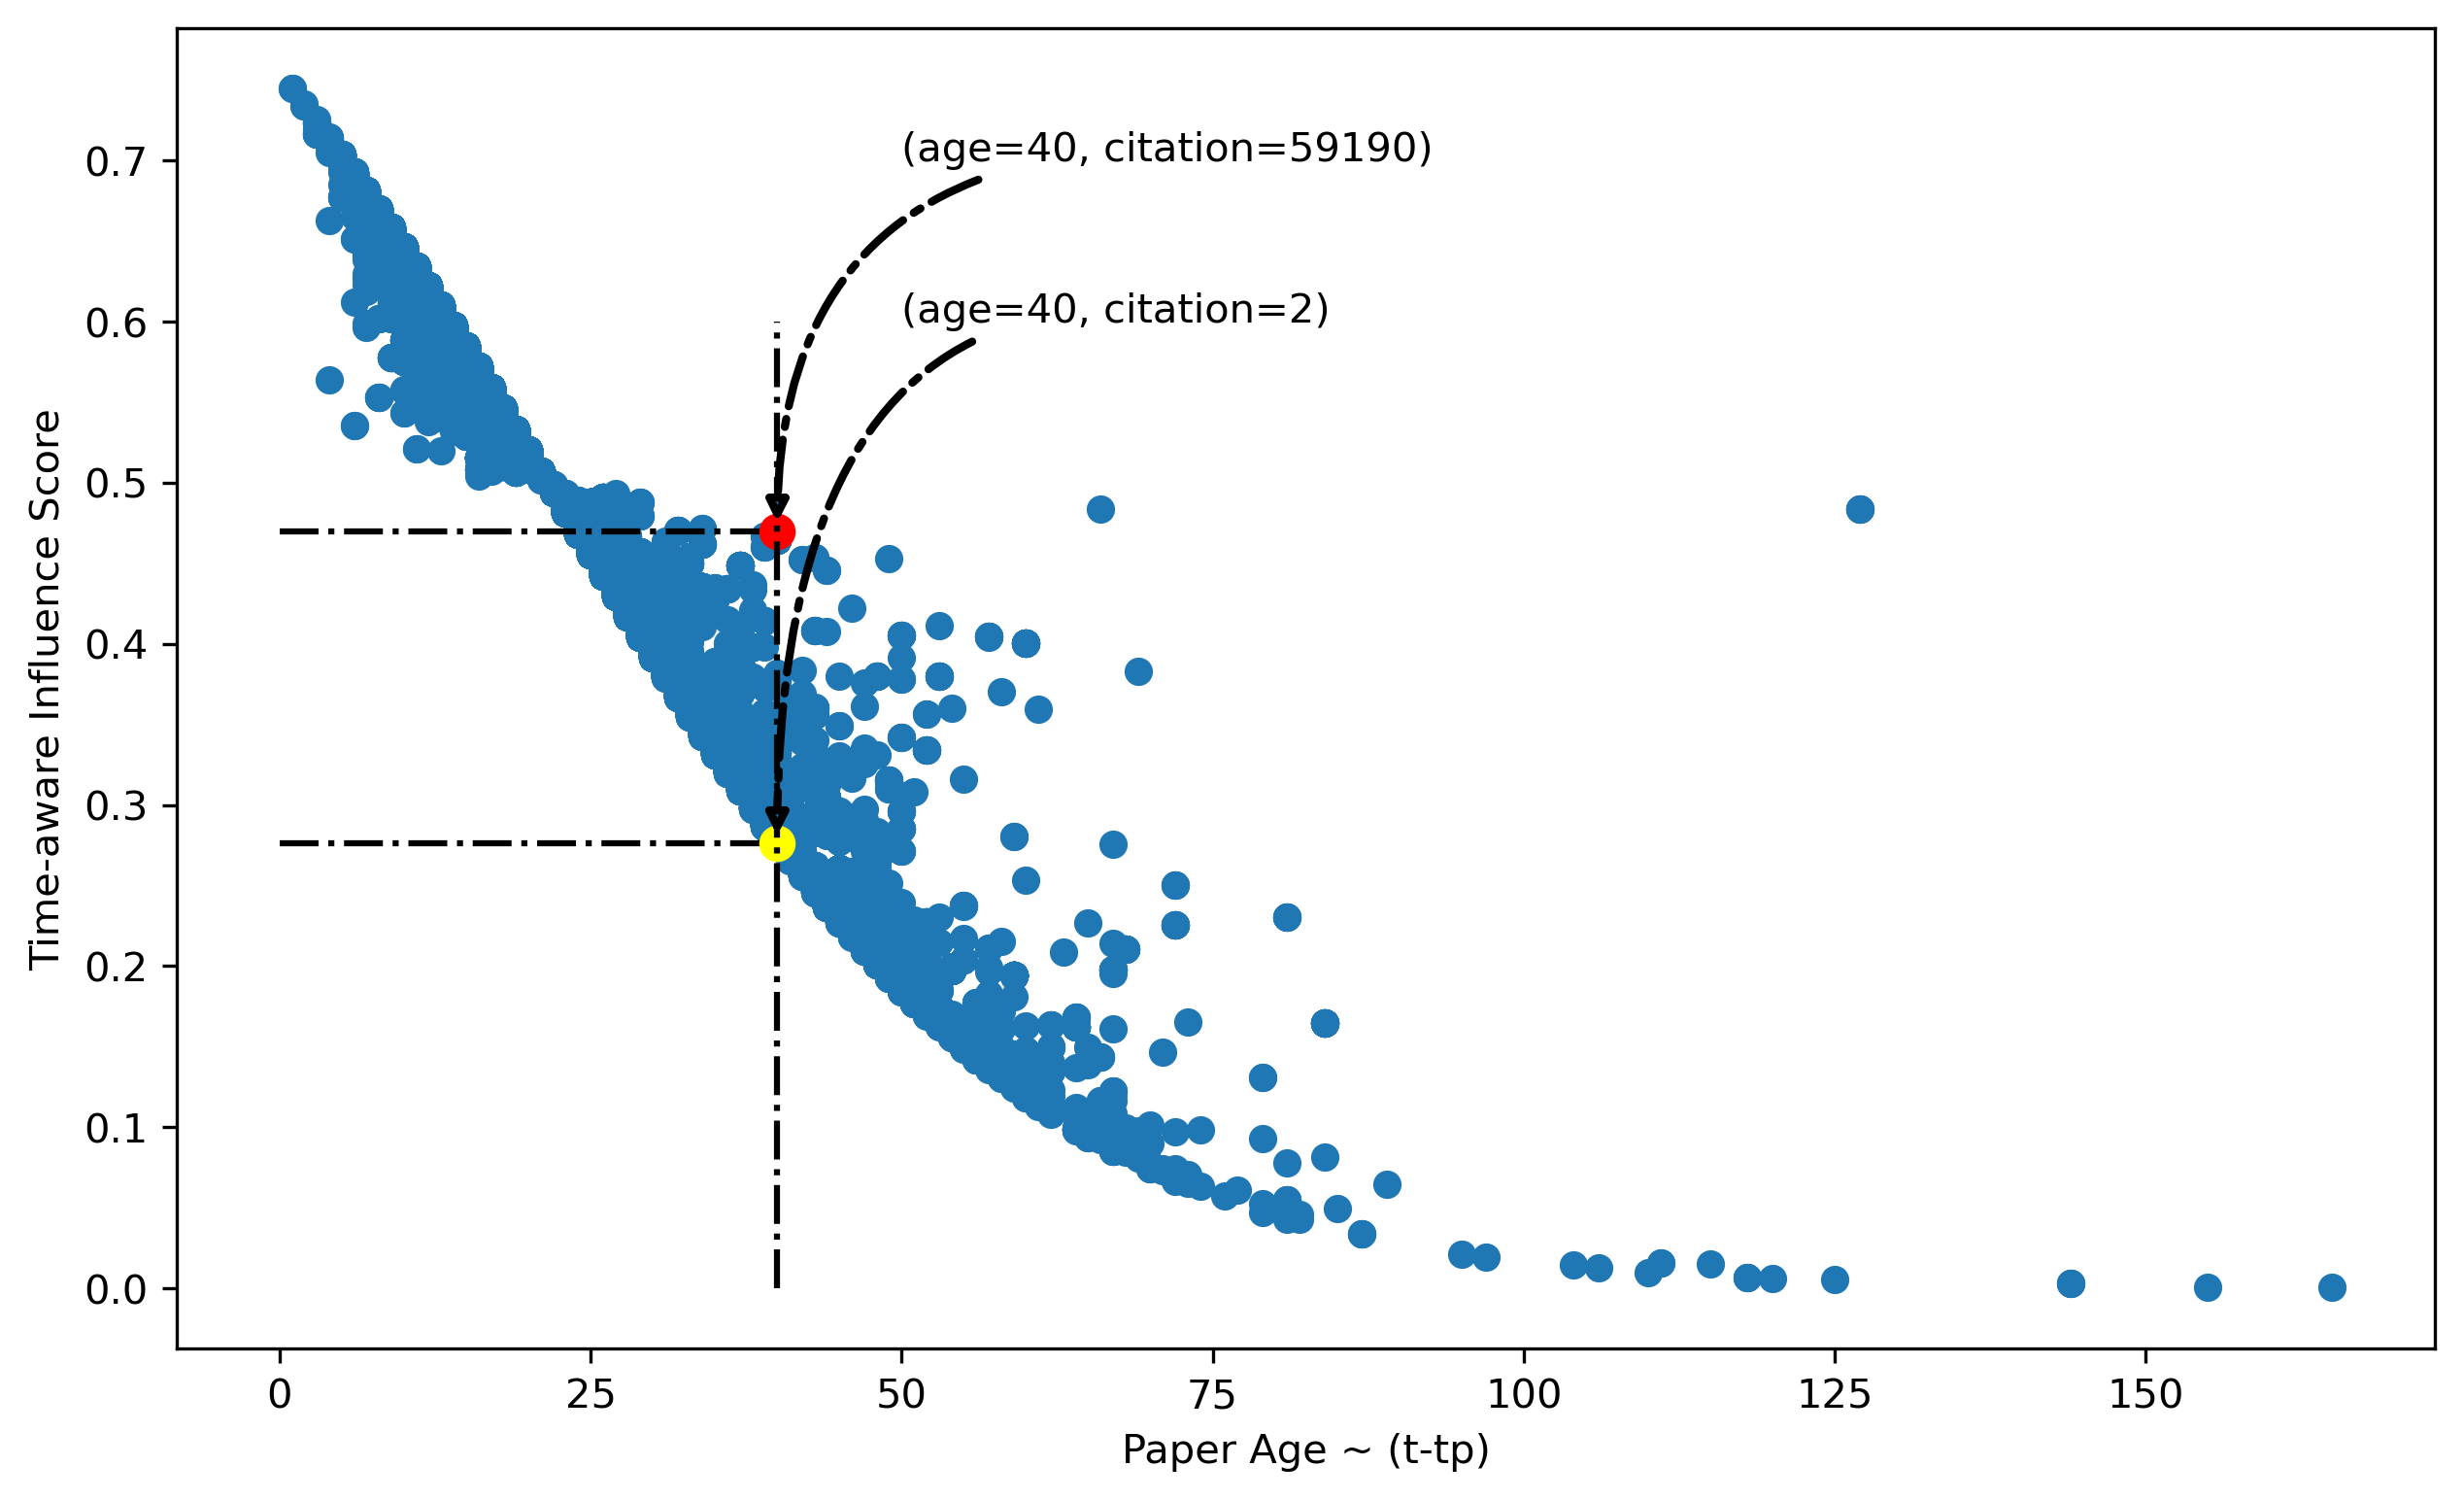

In [5]:
def calculateFreshness(row):
	_y = .5
	impact = row['citation_count_standard_norm'] + 1
	numerator = 1
	denominator = 1 + np.exp(_y * (1 / impact) * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.scatter(inf['age'], inf['influence_score'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.469922),
            xytext=(50, 0.7), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.469922, 0.469922], linestyle="-.", color="black")
ax.plot([40.0], [0.469922], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.275956),
            xytext=(50, 0.6), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.275956, 0.275956], linestyle="-.", color="black")
ax.plot([40.0], [0.275956], marker="o", markersize=8,
        markeredgecolor="yellow", markerfacecolor="yellow")
# vertical line
ax.plot([40.0, 40.0], [0, .6], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Influence Score')
plt.show()


## Bi-variate analysis

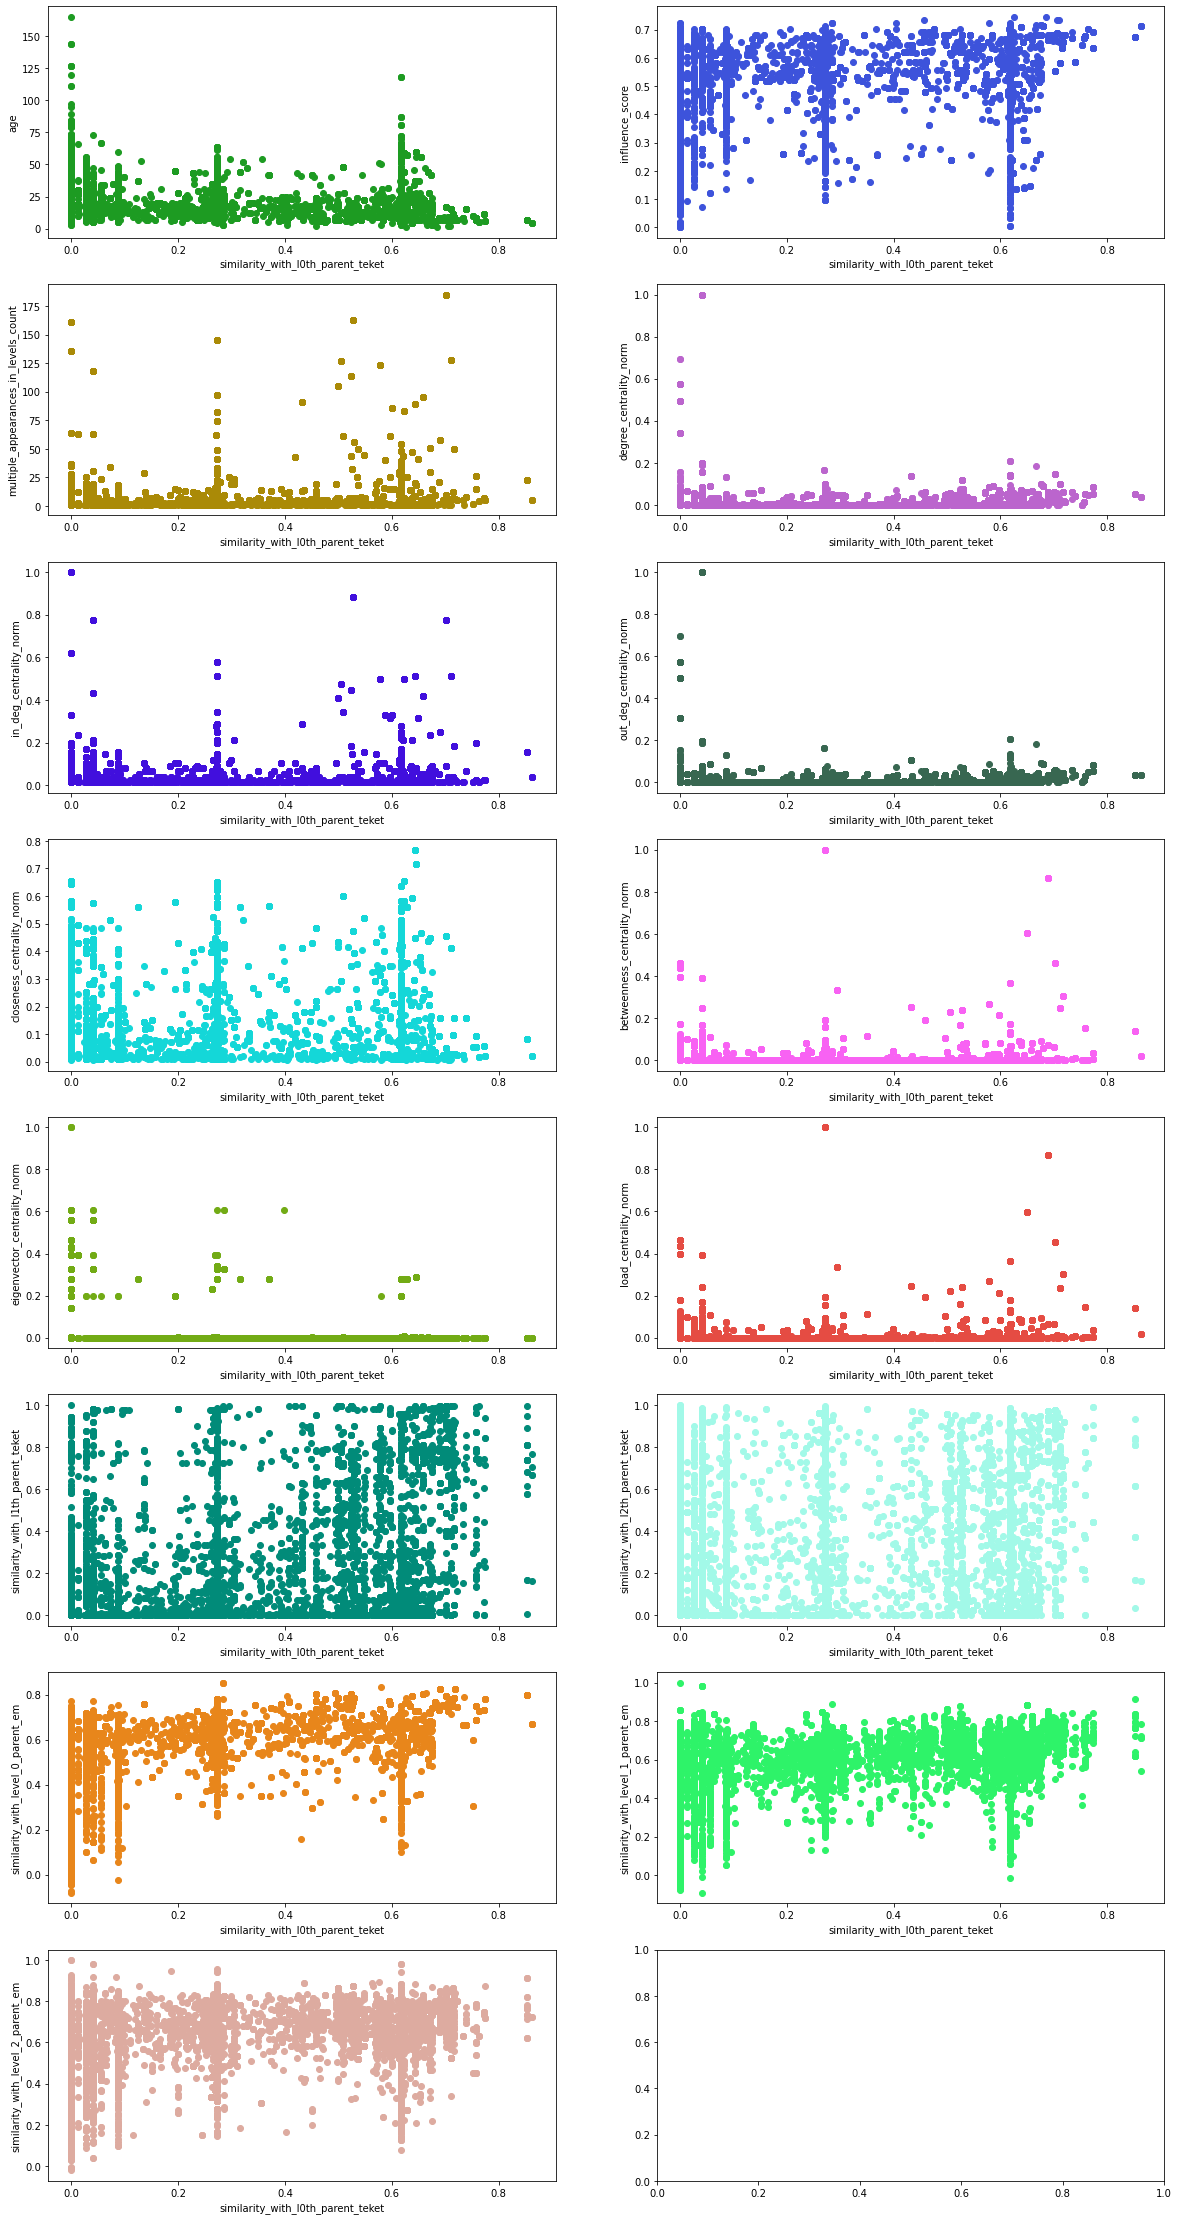

In [17]:
# x = 'multiple_appearances_in_levels_count'
x = 'similarity_with_l0th_parent_teket'
y_cols = [
    # 'level_no',
    'age',
    'influence_score',
    'multiple_appearances_in_levels_count',
    
    'degree_centrality_norm',
    'in_deg_centrality_norm',
    'out_deg_centrality_norm',
    'closeness_centrality_norm',
    'betweenness_centrality_norm',
    'eigenvector_centrality_norm',
    'load_centrality_norm',
    
    # 'similarity_with_l0th_parent_teket',
    'similarity_with_l1th_parent_teket',
    'similarity_with_l2th_parent_teket',
    
    'similarity_with_level_0_parent_em',
    'similarity_with_level_1_parent_em',
    'similarity_with_level_2_parent_em',
]
plot_one_vs_all_subplots(df, x_col=x, y_cols=y_cols, figsize=(20, 40))


## Aggregate analysis

### Centrality

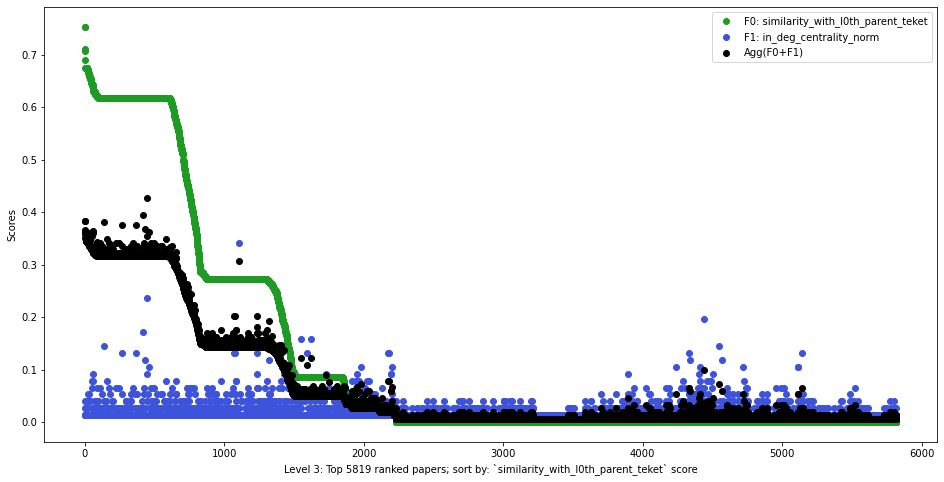

In [38]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    # 'degree_centrality_norm',
    # 'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']
all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

sum_cols = similarity_cols + centrality_cols
sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

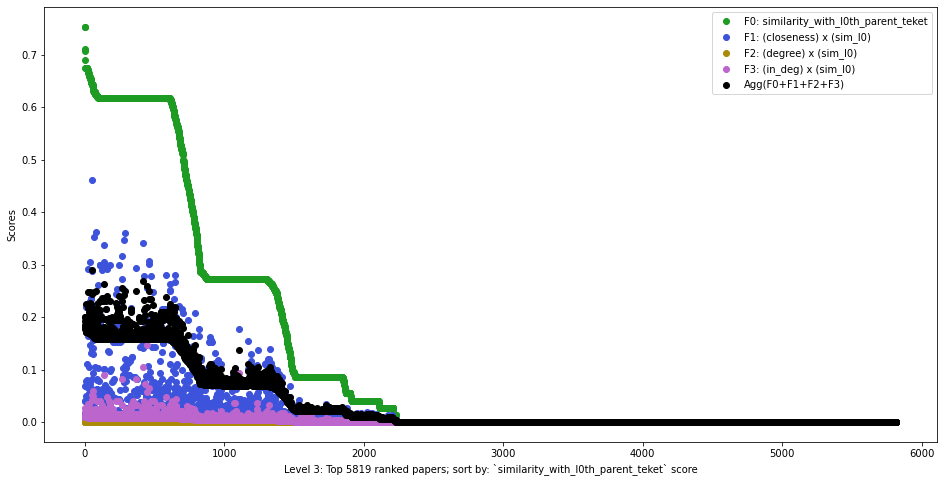

In [45]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(degree) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['degree_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f2,f3, f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

In [ ]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = 'influence_score x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
	data['similarity_with_l0th_parent_teket']

# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f2,f3, f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

### Influence

<AxesSubplot:xlabel='similarity_with_l0th_parent_teket', ylabel='influence_score'>

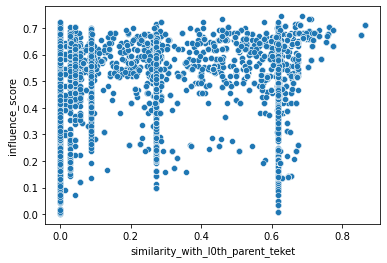

In [49]:
sns.scatterplot(data=data, x='similarity_with_l0th_parent_teket',
                y='influence_score')


<AxesSubplot:xlabel='age', ylabel='influence_score'>

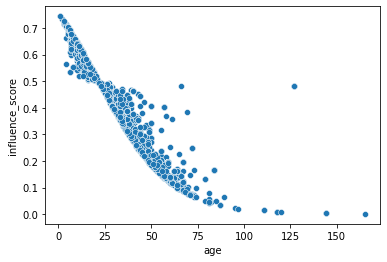

In [51]:
sns.scatterplot(data=data, x='age',
                y='influence_score')


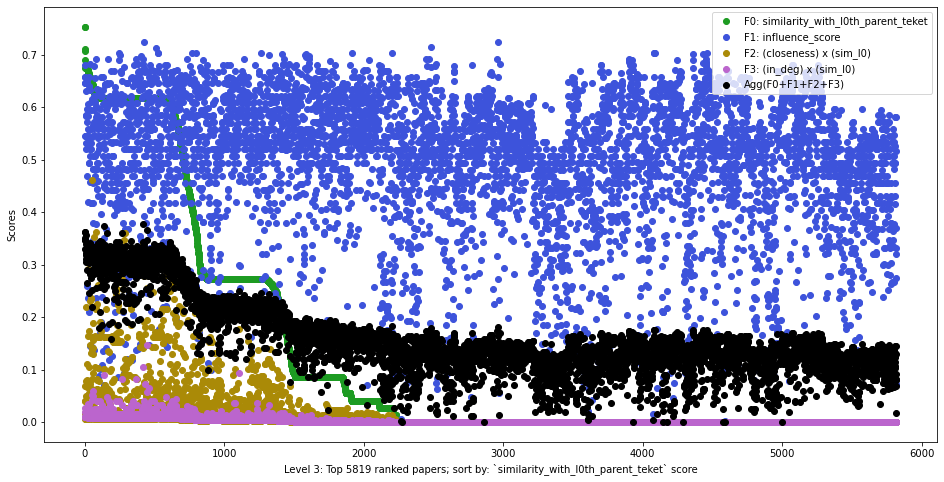

In [52]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = 'influence_score'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

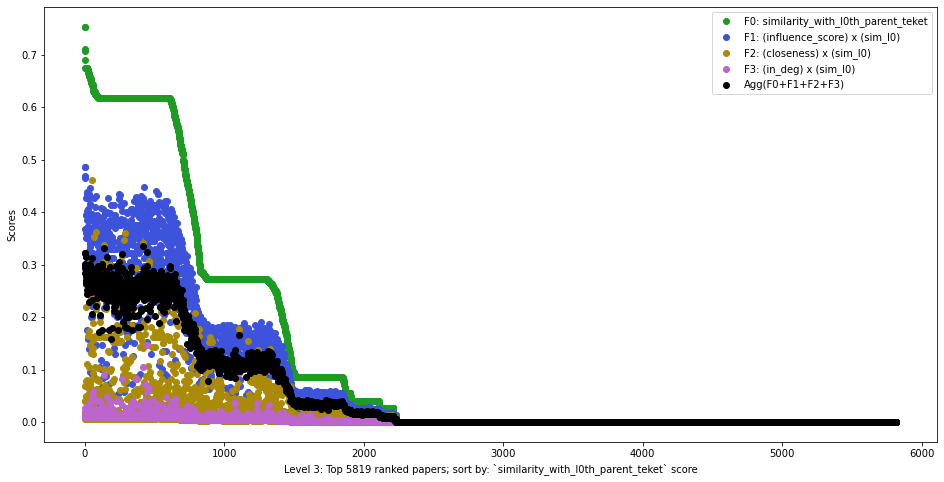

In [54]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']

# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

### l 2 3

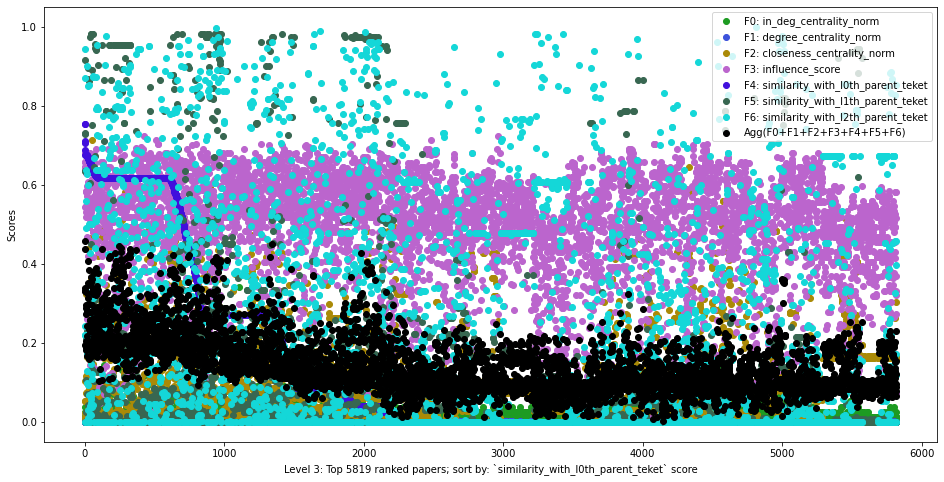

In [12]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()


sum_cols = centrality_cols + ['influence_score']+similarity_cols 

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

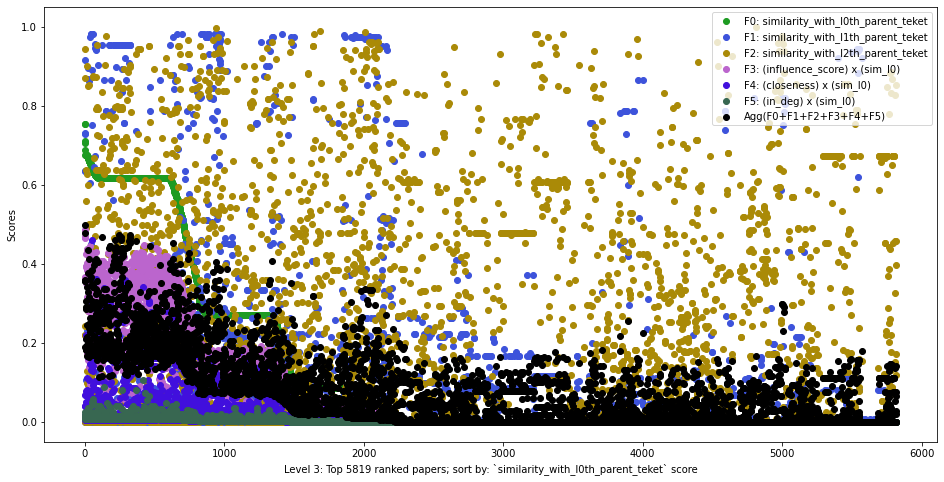

In [7]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

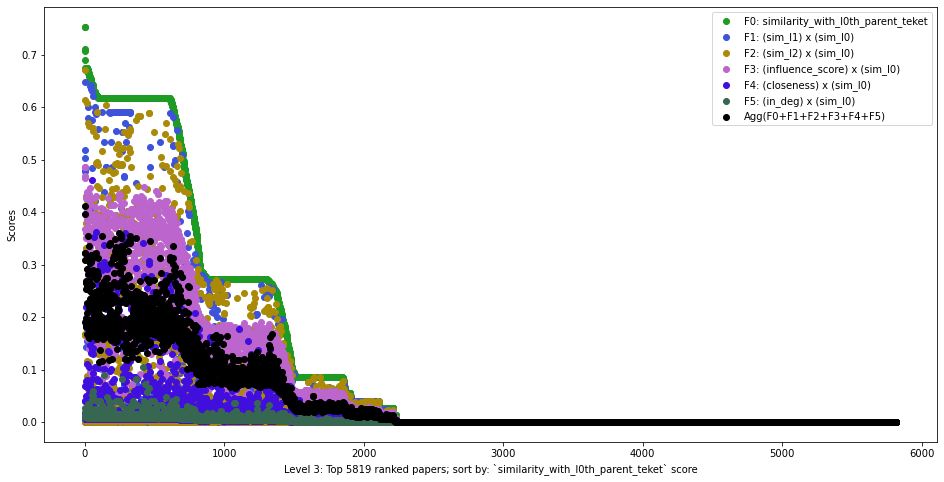

In [66]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
f4 = '(sim_l1) x (sim_l0)'
f5 = '(sim_l2) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
data[f4] = data['similarity_with_l1th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']
data[f5] = data['similarity_with_l2th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = ['similarity_with_l0th_parent_teket'] + [f4, f5,f3, f2, f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

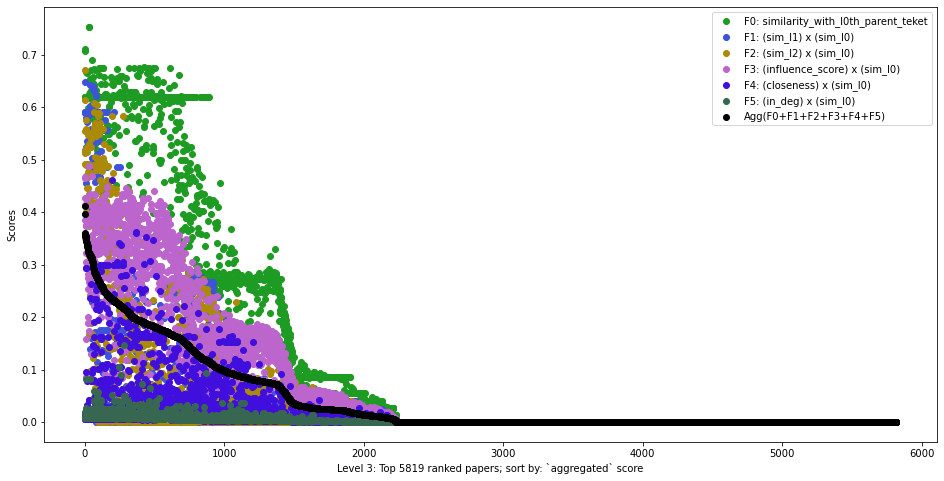

In [73]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
f4 = '(sim_l1) x (sim_l0)'
f5 = '(sim_l2) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
data[f4] = data['similarity_with_l1th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']
data[f5] = data['similarity_with_l2th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = ['similarity_with_l0th_parent_teket'] + [f4, f5,f3, f2, f1, ]

# sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,level_no=3, plot_type='scatter')#,sort_col=sort_col, )